In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [30]:
df = pd.read_csv(r"C:\Users\abuob\OneDrive\bank project.csv")

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [38]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
df.shape

(4521, 17)

In [39]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [40]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [42]:
df.rename(columns={'y':'Target'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [43]:
no,yes=df.Target.value_counts()
df.Target.value_counts()

no     4000
yes     521
Name: Target, dtype: int64

In [44]:
df['Target'].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: Target, dtype: float64

<Axes: >

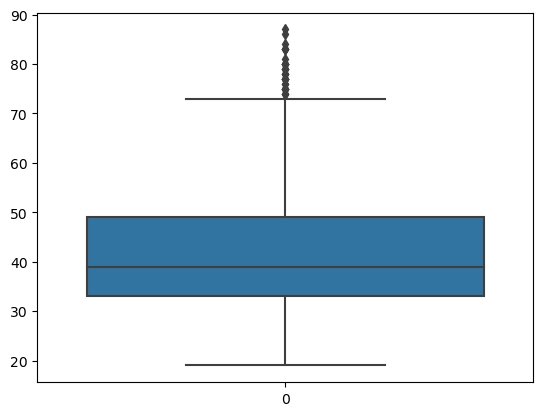

In [45]:
sns.boxplot(df.age)

In [54]:
print('1st quartile:',df['age'].quantile(q=0.25))
print('2nd quartile:',df['age'].quantile(q=0.50))
print('3rd quartile:',df['age'].quantile(q=0.75))
print('4th quartile:',df['age'].quantile(q=1.00))
print('Ages above:', df['age'].quantile(q=0.75) + 1.5 * (df['age'].quantile(q=0.75) - df['age'].quantile(q=0.25)), 'are outliers')


1st quartile: 33.0
2nd quartile: 39.0
3rd quartile: 49.0
4th quartile: 87.0
Ages above: 73.0 are outliers


In [56]:
print('numbers of outliers:',df[df['age'] > 70.5]['age'].count())
print('number of rows:', len(df))
print('outliers are:', round(df[df['age'] > 70.5]['age'].count()*100/len(df),2), '%')

numbers of outliers: 54
number of rows: 4521
outliers are: 1.19 %


C:\Users\abuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


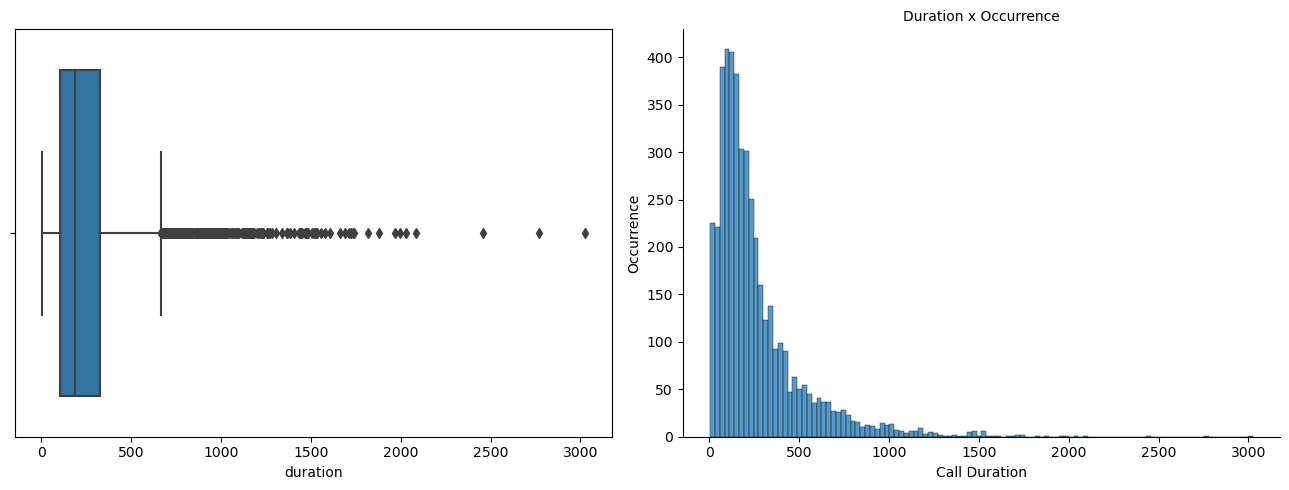

In [60]:
import matplotlib.pyplot as plt
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.boxplot(x='duration', data=df, orient='v', ax=ax1)
ax1.tick_params(labelsize=10)

sns.histplot(df['duration'], ax=ax2)  # Changed from sns.displot to sns.histplot
sns.despine(ax=ax2)
ax2.set_xlabel('Call Duration', fontsize=10)
ax2.set_ylabel('Occurrence', fontsize=10)
ax2.set_title('Duration x Occurrence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

plt.show()




In [62]:
print("Maximum duration call in minutes:", round(df['duration'].max()/60,1))
print("Minimum duration call in minutes:", round(df['duration'].min()/60,1))
print("Mean duration call in minutes:", round(df['duration'].mean()/60,1))
print("std dev of duration call in minutes:", round(df['duration'].std()/60,1))

Maximum duration call in minutes: 50.4
Minimum duration call in minutes: 0.1
Mean duration call in minutes: 4.4
std dev of duration call in minutes: 4.3


In [66]:
print('1st quartile:',df['duration'].quantile(q=0.25))
print('1st quartile:',df['duration'].quantile(q=0.25))
print('1st quartile:',df['duration'].quantile(q=0.25))
print('1st quartile:',df['duration'].quantile(q=0.25))
print('Duration calls above:', df['duration'].quantile(q=0.75) + 1.5 * (df['duration'].quantile(q=0.75) - df['duration'].quantile(q=0.25)), 'are outliers')

1st quartile: 104.0
1st quartile: 104.0
1st quartile: 104.0
1st quartile: 104.0
Duration calls above: 666.5 are outliers


In [67]:
print('numbers of outliers:',df[df['duration'] > 70.5]['duration'].count())
print('number of rows:', len(df))
print('outliers are:', round(df[df['duration'] > 70.5]['duration'].count()*100/len(df),2), '%')

numbers of outliers: 3907
number of rows: 4521
outliers are: 86.42 %


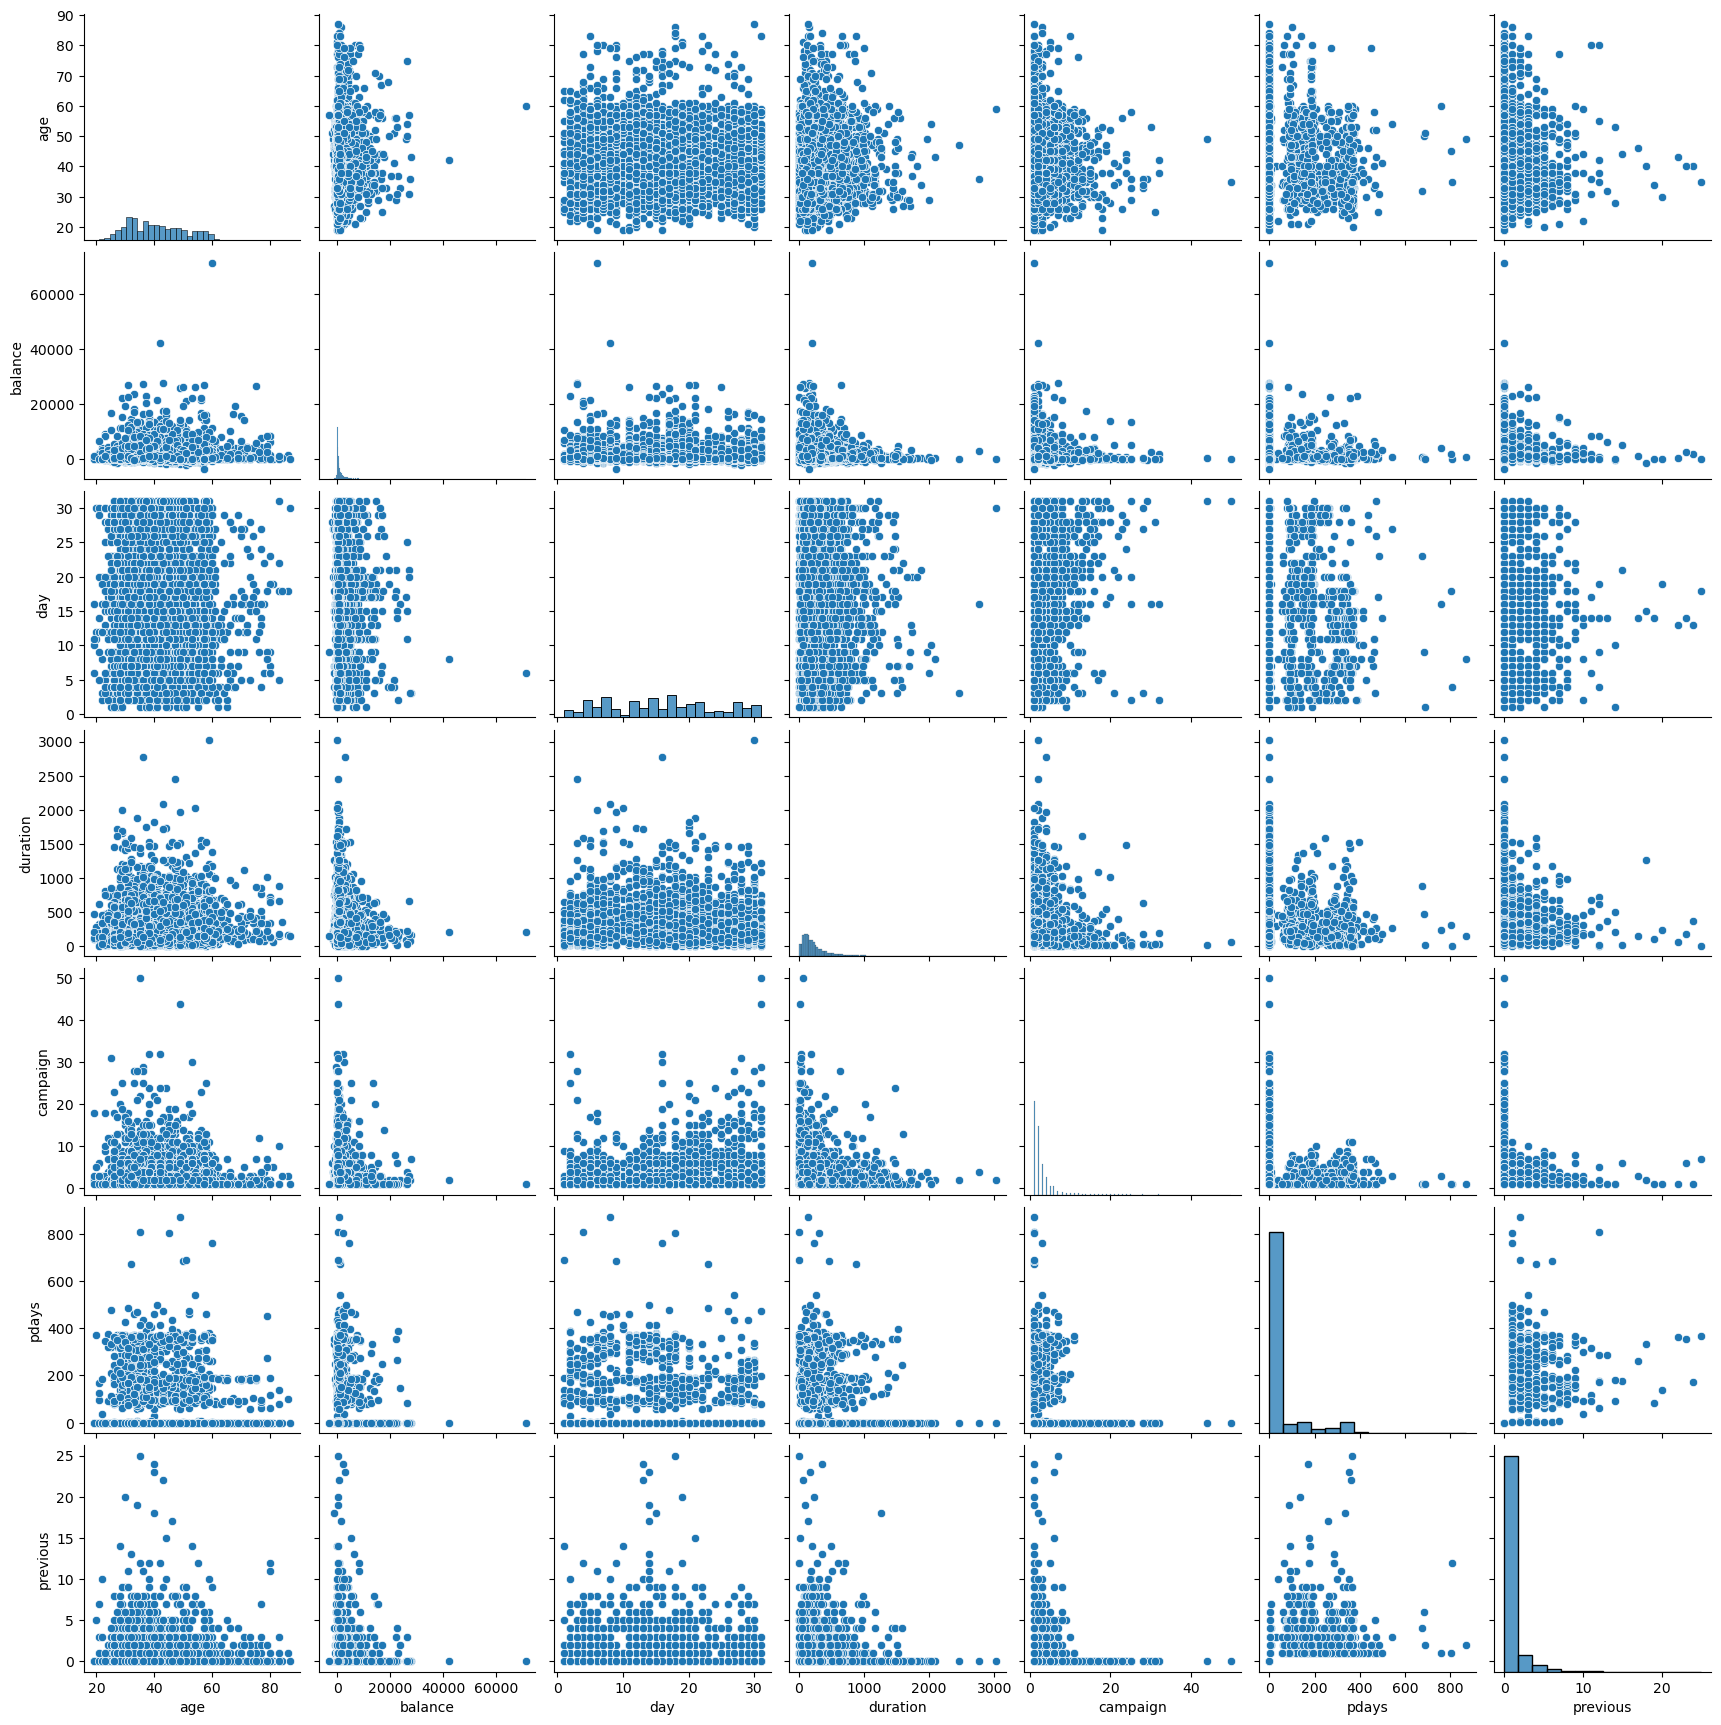

In [71]:
sns.pairplot(data = df)
plt.show()

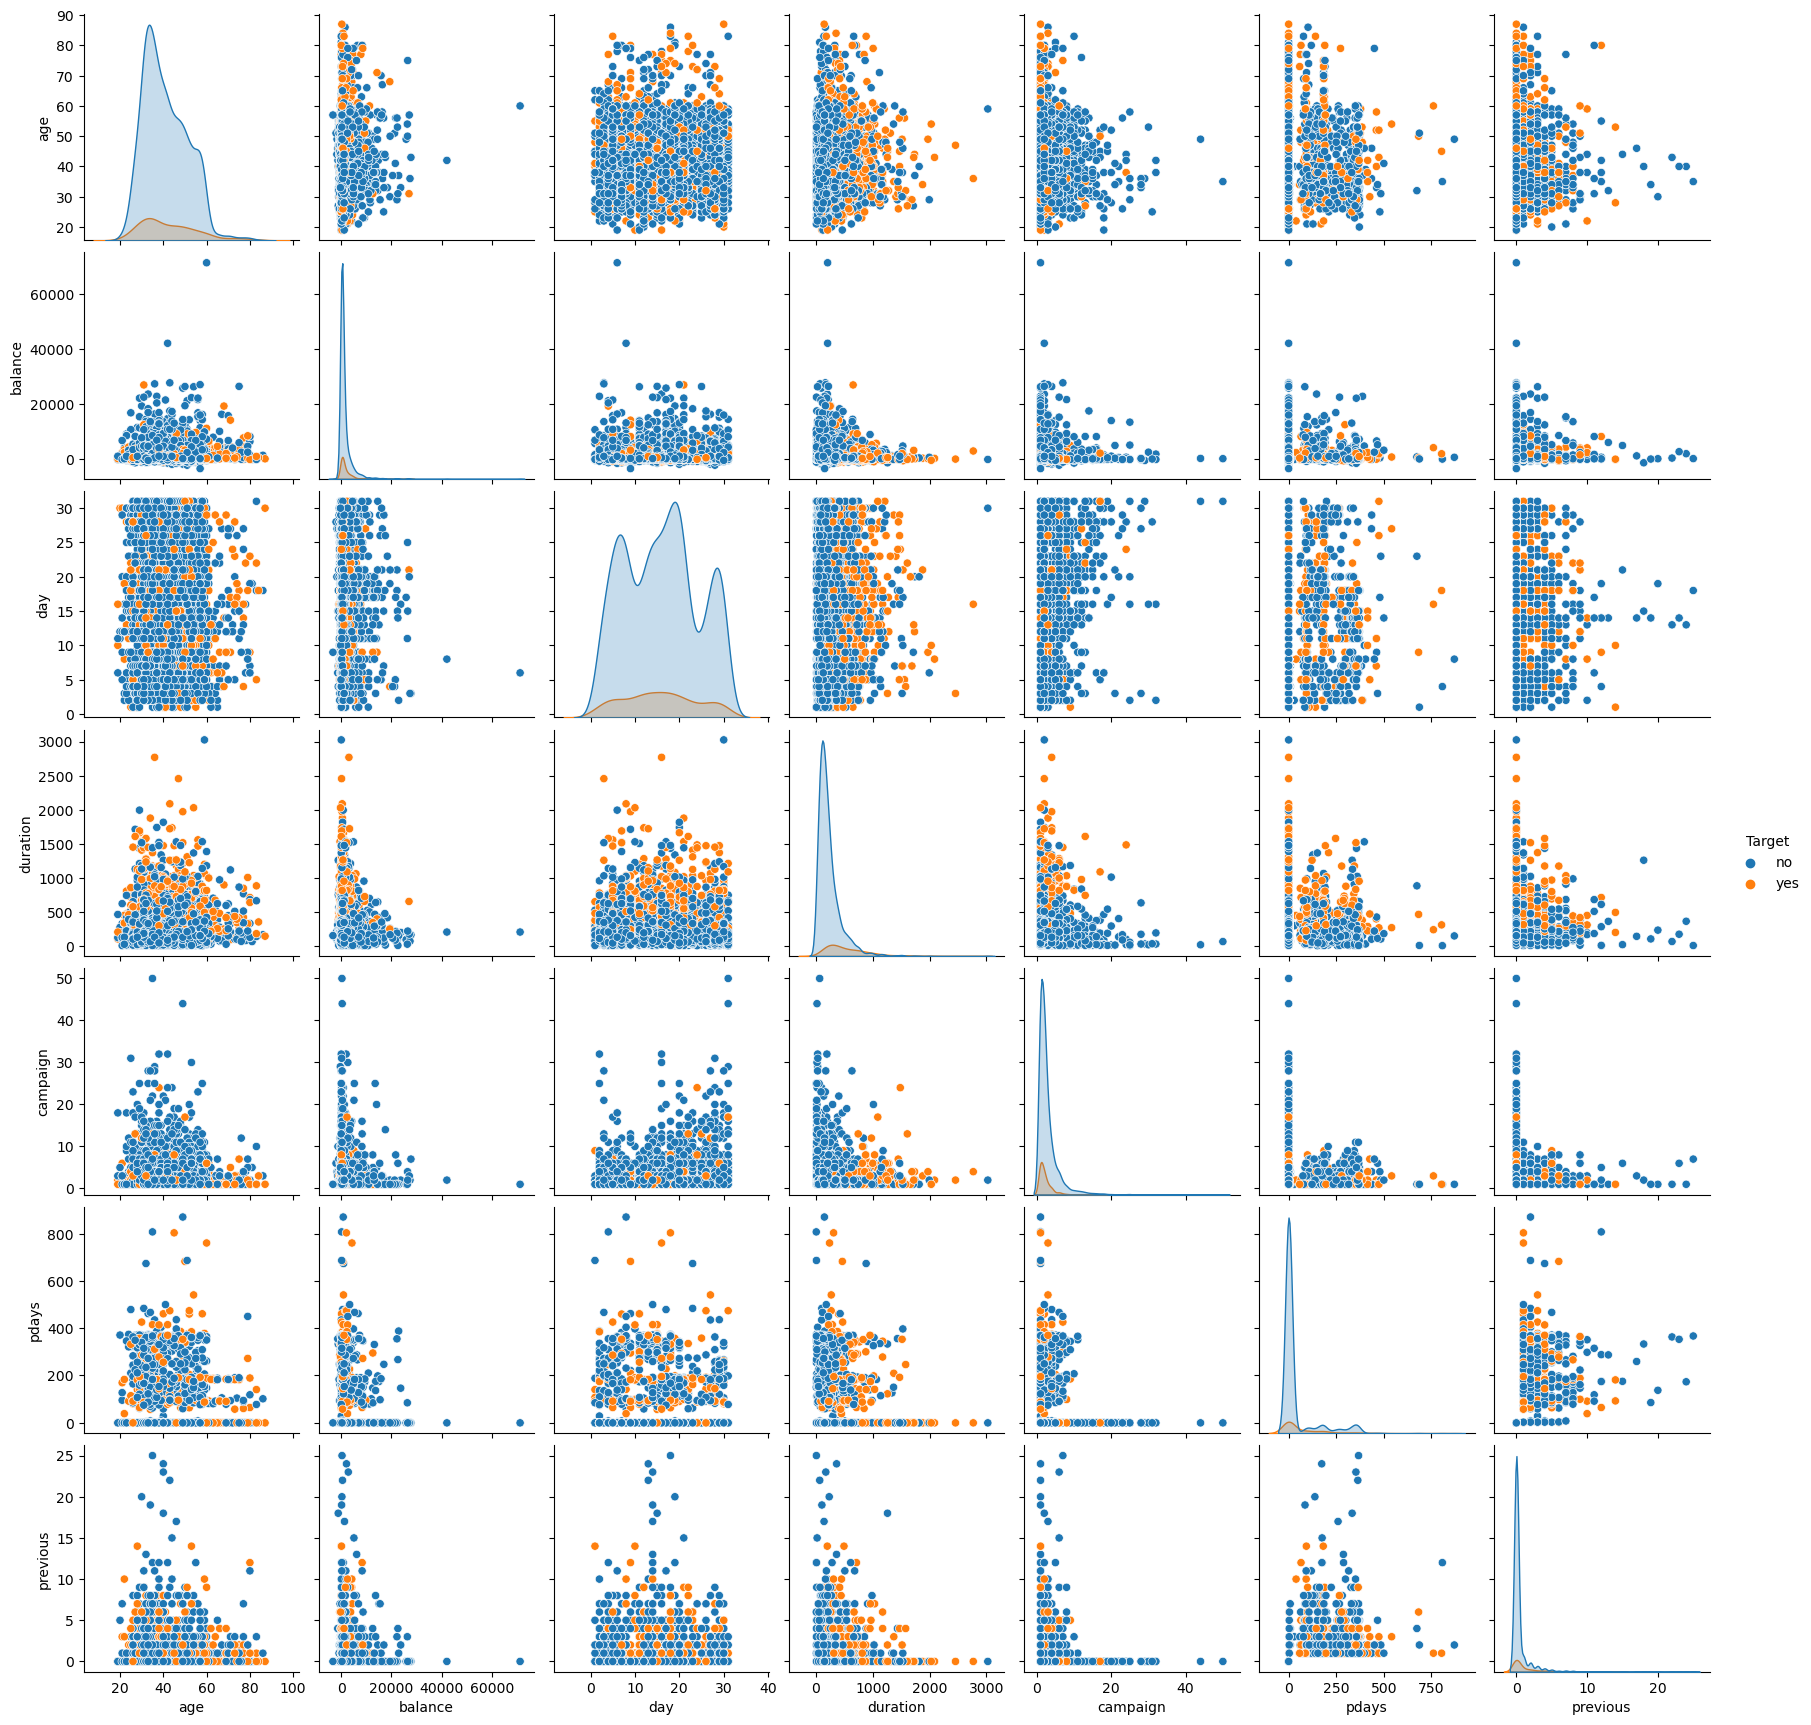

In [75]:
sns.pairplot(data = df, hue= 'Target')
plt.show()

C:\Users\abuob\AppData\Local\Temp\ipykernel_8604\920332043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

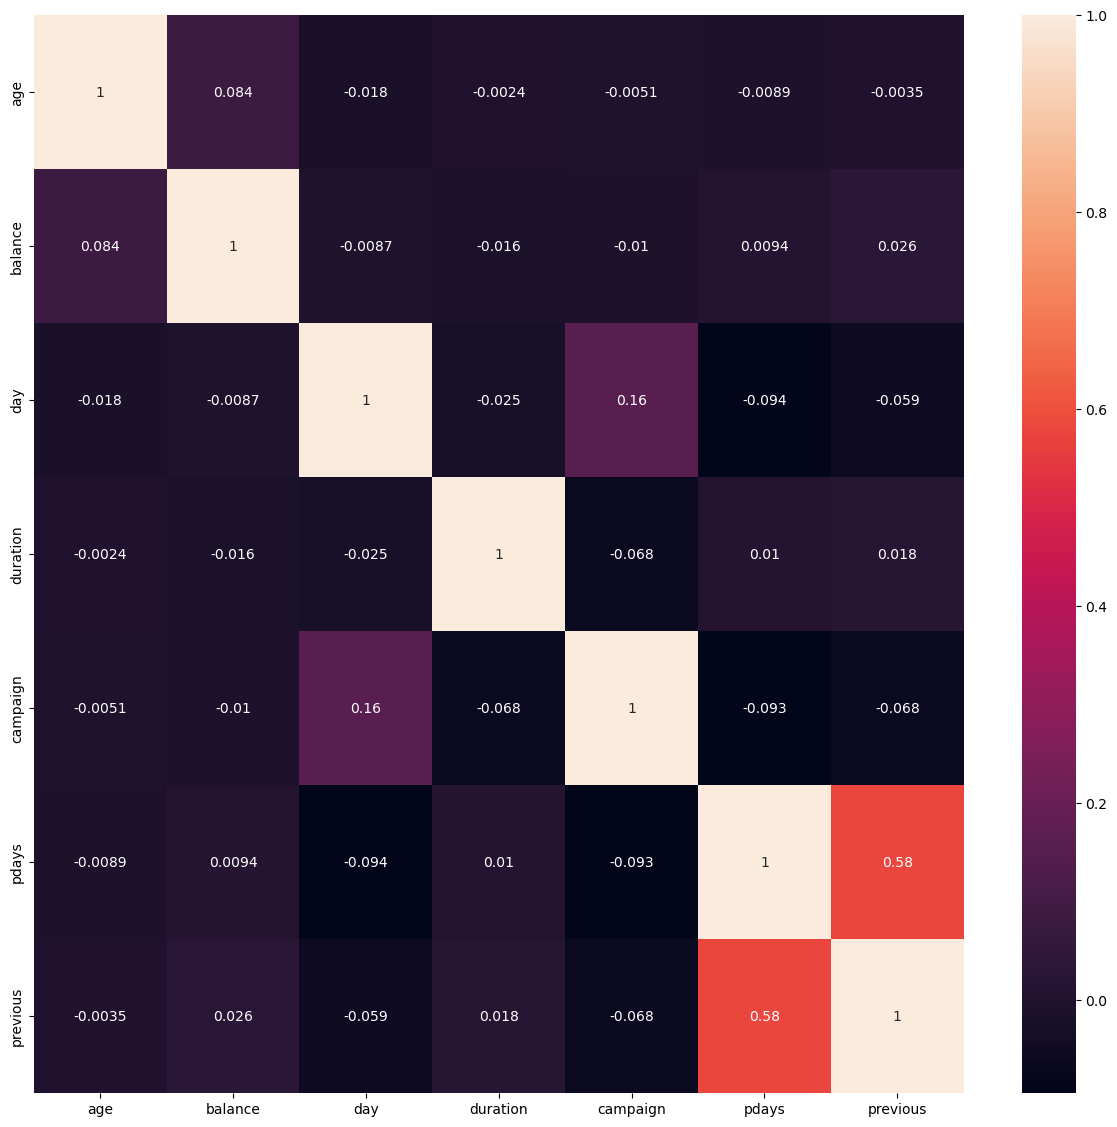

In [77]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True)

In [78]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

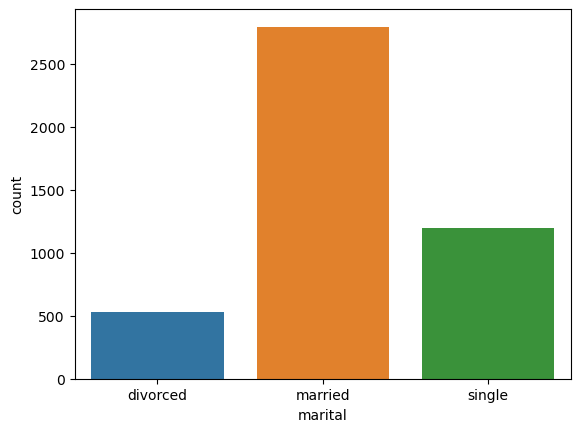

In [83]:
df['marital'] = df['marital'].astype('category')
sns.countplot(x='marital', data=df)

<Axes: xlabel='education', ylabel='count'>

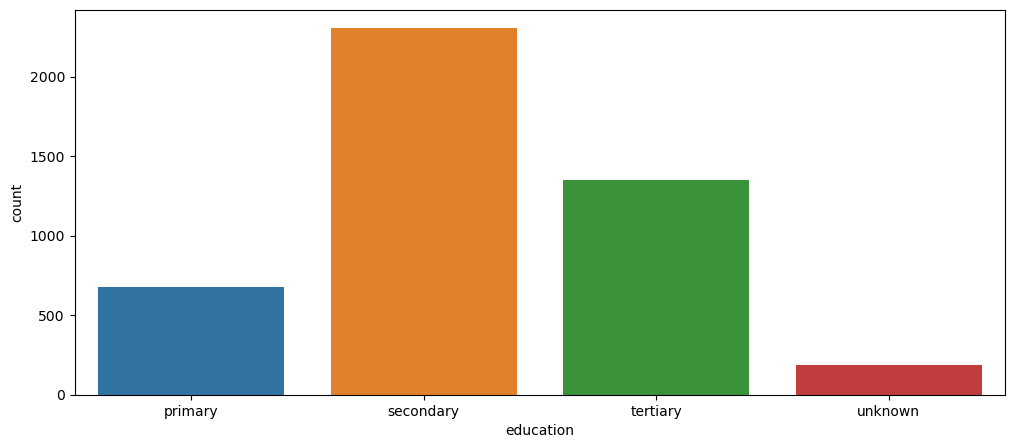

In [85]:
plt.figure(figsize=(12,5))
df['education'] = df['education'].astype('category')
sns.countplot(x='education', data=df)

<Axes: xlabel='default', ylabel='count'>

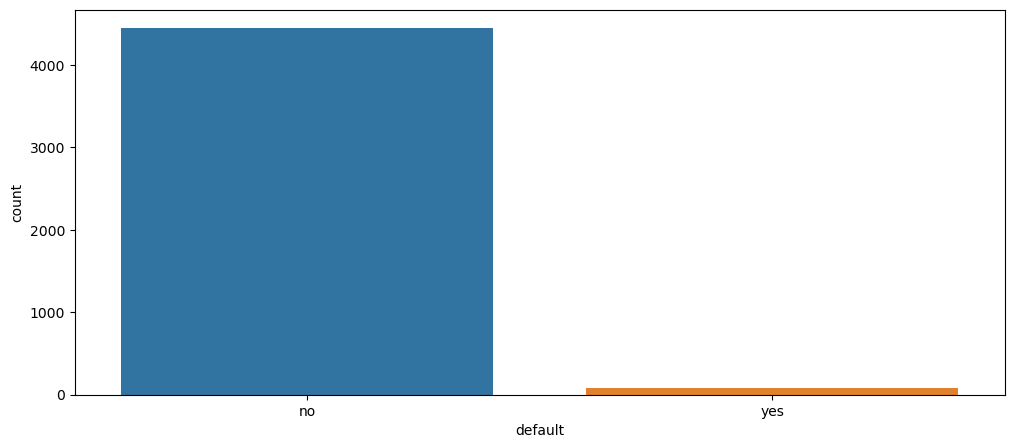

In [86]:
plt.figure(figsize=(12,5))
df['default'] = df['default'].astype('category')
sns.countplot(x='default', data=df)

<Axes: xlabel='housing', ylabel='count'>

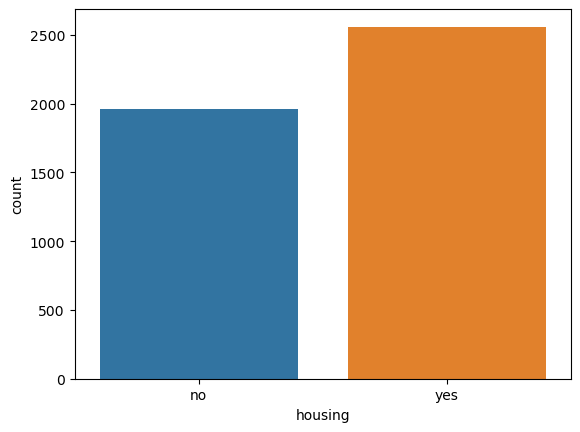

In [88]:
df['housing'] = df['housing'].astype('category')
sns.countplot(x='housing', data=df)

<Axes: xlabel='loan', ylabel='count'>

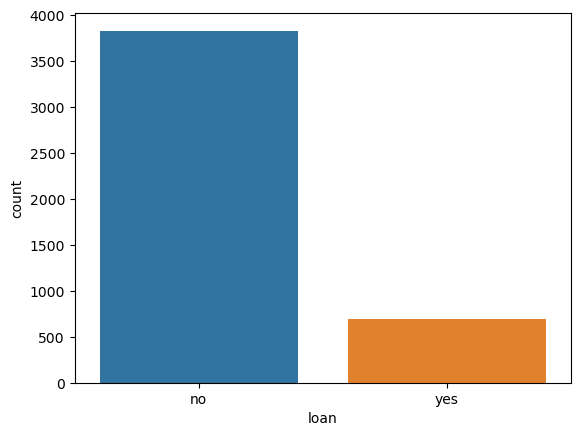

In [89]:
df['loan'] = df['loan'].astype('category')
sns.countplot(x='loan', data=df)

<Axes: xlabel='contact', ylabel='count'>

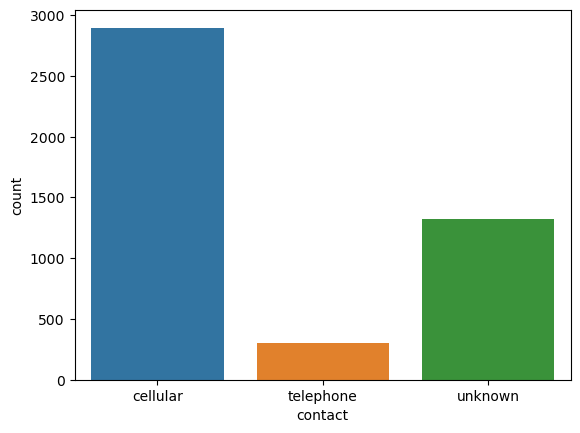

In [90]:
df['contact'] = df['contact'].astype('category')
sns.countplot(x='contact', data=df)

<Axes: xlabel='poutcome', ylabel='count'>

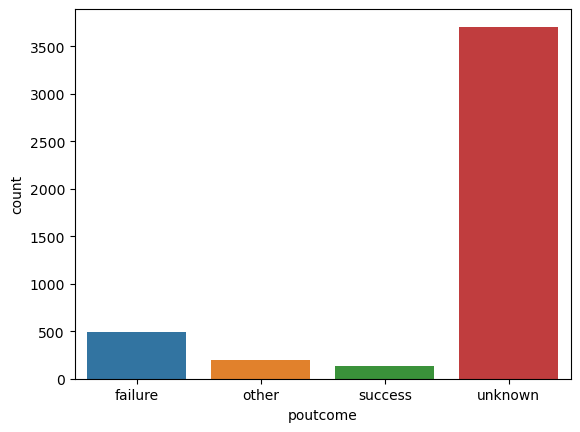

In [91]:
df['poutcome'] = df['poutcome'].astype('category')
sns.countplot(x='poutcome', data=df)

<Axes: xlabel='Target', ylabel='count'>

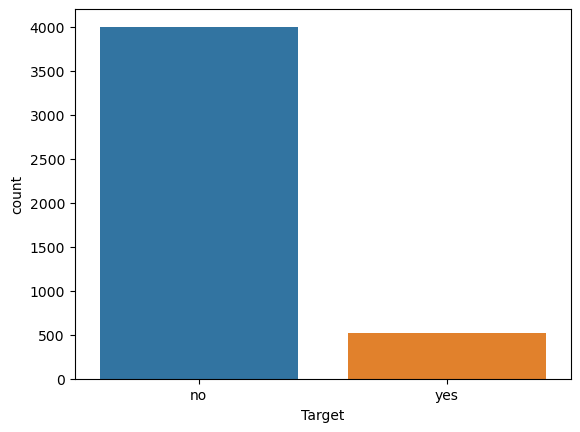

In [92]:
df['Target'] = df['Target'].astype('category')
sns.countplot(x='Target', data=df)

In [156]:
np.round(df.groupby(["Target"]).mean() ,1)
import warnings
warnings.filterwarnings("ignore")

In [94]:
pd.crosstab(df['job'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
job,,
retired,0.765217,0.234783
student,0.773810,0.226190
unknown,0.815789,0.184211
management,0.864809,0.135191
housemaid,0.875000,0.125000
admin.,0.878661,0.121339
self-employed,0.890710,0.109290
technician,0.891927,0.108073
unemployed,0.898438,0.101562


In [95]:
pd.crosstab(df['marital'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
marital,,
divorced,0.854167,0.145833
single,0.860368,0.139632
married,0.900965,0.099035


In [96]:
pd.crosstab(df['education'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
education,,
tertiary,0.857037,0.142963
secondary,0.893755,0.106245
unknown,0.898396,0.101604
primary,0.905605,0.094395


In [98]:
print(pd.crosstab(df['job'], df['Target'], normalize='index').sort_values(by='yes',ascending=False))
print(df['default'].value_counts(normalize=True))

Target               no       yes
job                              
retired        0.765217  0.234783
student        0.773810  0.226190
unknown        0.815789  0.184211
management     0.864809  0.135191
housemaid      0.875000  0.125000
admin.         0.878661  0.121339
self-employed  0.890710  0.109290
technician     0.891927  0.108073
unemployed     0.898438  0.101562
services       0.908873  0.091127
entrepreneur   0.910714  0.089286
blue-collar    0.927061  0.072939
no     0.98319
yes    0.01681
Name: default, dtype: float64


In [99]:
pd.crosstab(df['housing'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
housing,,
no,0.846585,0.153415
yes,0.914029,0.085971


In [100]:
pd.crosstab(df['loan'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
loan,,
no,0.875196,0.124804
yes,0.937771,0.062229


In [101]:
pd.crosstab(df['contact'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
contact,,
telephone,0.853821,0.146179
cellular,0.856354,0.143646
unknown,0.953927,0.046073


In [102]:
pd.crosstab(df['month'], df['Target'], normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
month,,
oct,0.537500,0.462500
dec,0.550000,0.450000
mar,0.571429,0.428571
sep,0.673077,0.326923
apr,0.808874,0.191126
feb,0.828829,0.171171
aug,0.875197,0.124803
jan,0.891892,0.108108
jun,0.896422,0.103578


In [107]:
#Binning
def binning(col, cut_points, labels=None):
    # define min and max value
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points 
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0.....(n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    
    #Binning using cut functionof pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [110]:
#Binning compaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
df['campaign_range'] = binning(df['campaign'], cut_points, labels)
df['campaign_range'].value_counts()

<=2    2998
>4      640
3       558
4       325
Name: campaign_range, dtype: int64

In [111]:
df.drop(['campaign'], axis=1, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'pdays', 'previous',
       'poutcome', 'Target', 'camapign_range', 'campaign_range'],
      dtype='object')

In [112]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] <= 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] <= 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] <= 70) & (dataframe['age'] <= 98), 'age'] = 4
    
    return dataframe
age(df);
    
    

In [114]:
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180), 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319), 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration'] > 644.5, 'duration'] = 5
    
    return data
duration(df);

In [115]:
x = df.drop("Target", axis=1)
y = df["Target"]
x = pd.get_dummies(x,drop_first=True)
y=y.replace(['yes','no'],[1,0])

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

[[1101   91]
 [  90   75]]
87.0


Text(0.5, 1.0, 'DecisionTreeClassifier')

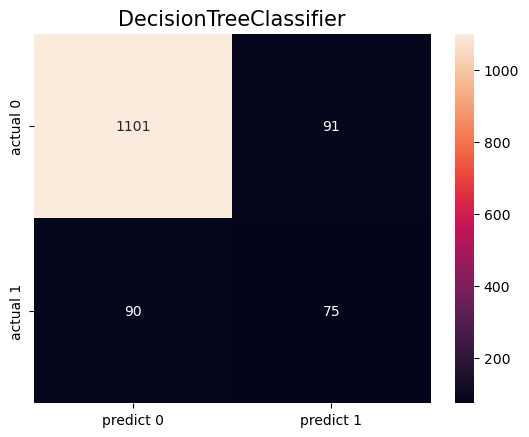

In [129]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1) #criterion = entopy, gini
dtree.fit(x_train, y_train)
dtreepred = dtree.predict(x_test)

cm=confusion_matrix(y_test, dtreepred)
print(cm)
print(round(accuracy_score(y_test, dtreepred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("DecisionTreeClassifier",fontsize =15)

In [130]:
DTREECV = (cross_val_score(dtree, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_Recall = recall_score(y_test, dtreepred)
DTREECV_F1=f1_score(y_test, dtreepred)
DTREECV_pre=precision_score(y_test,dtreepred)

[[1174   18]
 [ 121   44]]
90.0


Text(0.5, 1.0, 'RandomForestClassifier')

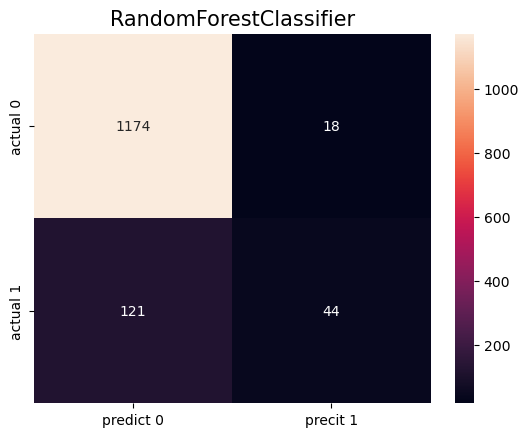

In [132]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)
cm=confusion_matrix(y_test, rfcpred)
print(cm)
print(round(accuracy_score(y_test, rfcpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','precit 1'])
plt.title("RandomForestClassifier",fontsize =15)

In [133]:
RFCCV_Recall = recall_score(y_test, rfcpred)
RFCCV_pre=precision_score(y_test,rfcpred)
RFCCV_F1=f1_score(y_test, rfcpred)
RFCCV = (cross_val_score(rfc, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [157]:
bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=200,random_state=1)
bgcl = bgcl.fit(x_train, y_train)

0.8968312453942521
Accuracy score is  90.0
[[1156   36]
 [ 104   61]]


Text(0.5, 1.0, 'BaggingClassifier')

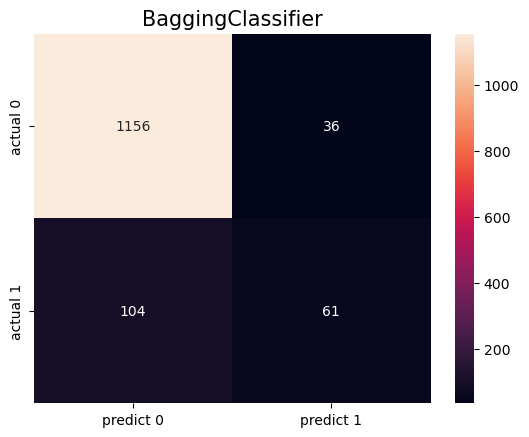

In [136]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test))
print("Accuracy score is ",round(accuracy_score(y_test, rfcpred),2)*100)
cm=confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("BaggingClassifier", fontsize =15)

In [160]:
BAGCV = (cross_val_score(bgcl, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
BAGCV_Recall = recall_score(y_test, y_predict)
BAGCV_pre=precision_score(y_test,y_predict)
BAGCV_F1=f1_score(y_test, y_predict)

[[1162   30]
 [ 106   59]]
90.0


Text(0.5, 1.0, 'GradientBoostingClassiifer')

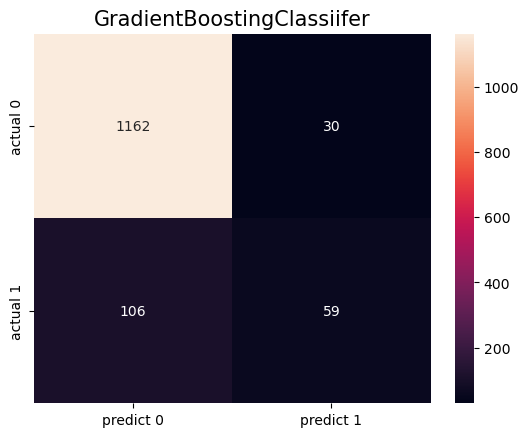

In [162]:
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
gbkpred = gbk.predict(x_test)
cm=confusion_matrix(y_test, gbkpred)
print(cm)
print(round(accuracy_score(y_test, gbkpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("GradientBoostingClassiifer", fontsize =15)


In [142]:
GBKCV = (cross_val_score(gbk, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBKCV_Recall = recall_score(y_test, gbkpred)
GBKCV_pre=precision_score(y_test,gbkpred)
GBKCV_F1=f1_score(y_test, gbkpred)

In [151]:
models = pd.DataFrame({
                   'Models': ['Rnadom Forest Classifier', 'Decision Tree Classifier', 'Bagging', 'Gradient Boosting'],
                   'Score': [RFCCV_pre, DTREECV_pre,BAGCV_pre,GBKCV_pre]})
models.sort_values(by='Score', ascending=False)

,Models,Score
0,Rnadom Forest Classifier,0.709677
3,Gradient Boosting,0.640449
2,Bagging,0.628866
1,Decision Tree Classifier,0.451807


In [152]:
models = pd.DataFrame({
                   'Models': ['Rnadom Forest Classifier', 'Decision Tree Classifier', 'Bagging', 'Gradient Boosting'],
                   'Score': [RFCCV_F1, DTREECV_F1,BAGCV_F1,GBKCV_F1]})
models.sort_values(by='Score', ascending=False)

,Models,Score
2,Bagging,0.465649
1,Decision Tree Classifier,0.453172
3,Gradient Boosting,0.448819
0,Rnadom Forest Classifier,0.387665


In [153]:
models = pd.DataFrame({
                   'Models': ['Rnadom Forest Classifier', 'Decision Tree Classifier', 'Bagging', 'Gradient Boosting'],
                   'Score': [RFCCV_Recall, DTREECV_Recall,BAGCV_Recall,GBKCV_Recall]})
models.sort_values(by='Score', ascending=False)

,Models,Score
1,Decision Tree Classifier,0.454545
2,Bagging,0.369697
3,Gradient Boosting,0.345455
0,Rnadom Forest Classifier,0.266667


In [154]:
models = pd.DataFrame({
                   'Models': ['Rnadom Forest Classifier', 'Decision Tree Classifier', 'Bagging', 'Gradient Boosting'],
                   'Score': [RFCCV*100, DTREECV*100,BAGCV*100,GBKCV*100]})
models.sort_values(by='Score', ascending=False)

,Models,Score
2,Bagging,90.391726
3,Gradient Boosting,90.075969
0,Rnadom Forest Classifier,89.885597
1,Decision Tree Classifier,86.473466
